In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time

In [2]:
def InsertionSort(array):
    
    comparisons = 0
    
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        while j >= 0:
            if key >= array[j]:
                comparisons += 1
                break
            else:
                array[j + 1] = array[j]
                comparisons += 1
                j -= 1
        array[j + 1] = key
    
    return array, comparisons


def MergeArray(lArr,rArr):
    
    l = 0
    r = 0
    comparisons = 0
    Arr = []
    
    while l < len(lArr) and r < len(rArr):
        if lArr[l] < rArr[r]:
            Arr.append(lArr[l])
            l += 1
        elif lArr[l] > rArr[r]:
            Arr.append(rArr[r])
            r += 1
        else:
            Arr.append(lArr[l])
            Arr.append(rArr[r])
            l += 1
            r += 1
        comparisons += 1
    
    while l < len(lArr):
        Arr.append(lArr[l])
        l += 1
    
    while r < len(rArr):
        Arr.append(rArr[r])
        r += 1
    
    return Arr, comparisons


def HybridSort(array,S):
    
    Start_time = time.time()
    comparisons = 0
    
    for i in range(0,len(array),S):
        a,b = InsertionSort(array[i : i + S])
        array[i : i + S] = a
        comparisons += b
    merge = S
    
    while merge < len(array):
        for i in range(0,len(array),2*merge):
            c,d = MergeArray(array[i : i + merge],array[i + merge : i + 2 * merge])
            array[i : i + 2 * merge] = c
            comparisons += d
        merge *= 2
    
    End_time = time.time()
    runtime = float("{0:.30f}".format(1000*(End_time - Start_time)))
    
    return comparisons, runtime


In [16]:
Test_arr = np.random.randint(1,1000000,1000000)
Test_arr_copy = np.copy(Test_arr)
#print("Random Array")
#print(Test_arr)
#print()
print("Hybrid sort time",HybridSort(Test_arr,14)[1], "ms")
print("Merge sort time",HybridSort(Test_arr_copy,1)[1], "ms")
#print("Sorted Array")
#print(Test_arr)

Hybrid sort time 10333.309888839722 ms
Merge sort time 9783.72573852539 ms


In [4]:
comparisons = []
times = []
subarray = []
Test_Case = np.arange(1000, 0, -1)

for i in range(1,65):
    Test_Case_1 = Test_Case.copy()
    subarray.append(i)
    
    key, runtime = HybridSort(Test_Case_1,i)
        
    comparisons.append(key)
    times.append(runtime)

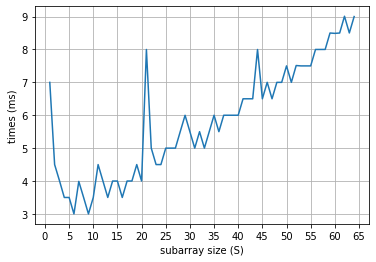

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(subarray, times)
ax.grid(True)
plt.xticks(range(0,66,5))
plt.xlabel('subarray size (S)')
plt.ylabel('times (ms)')
plt.show()

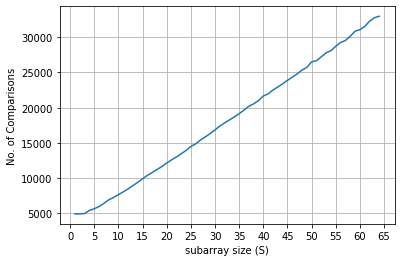

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(subarray, comparisons)
ax.grid(True)
plt.xticks(range(0,66,5))
plt.xlabel('subarray size (S)')
plt.ylabel('No. of Comparisons')
plt.show()